### Assignment
Build a model for Surprise Housing to understand the price of Houses in the Australian market. This model will then be used by the management to understand how exactly the prices vary with the variables, manipulate the strategy of the firm and concentrate on areas that will yield high returns.
 
### Business Goal 
You are required to model the price of houses with the available independent variables. 

### Expected Outcome
The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Setting display option to show all columns and values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load dataset

In [2]:
housing = pd.read_csv("train.csv")

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In [3]:
housing.shape

(1460, 81)

### Check Data Quality

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handle Missing Values

In [6]:
print(f'Total Row Count: {len(housing)}')
nulls = pd.DataFrame()
nulls['Null_Count'] = housing.isnull().sum()
nulls['Null_Percentage'] = round(100*(housing.isnull().sum()/len(housing.index)), 2)
nulls.sort_values(by=['Null_Percentage'], ascending=False)

Total Row Count: 1460


,Null_Count,Null_Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [7]:
housing['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [8]:
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [9]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

*Observations*
- Over 95% of PoolQC and MiscFeature are NA.
- Over 80% of Alley and Fence are also NA.
- Thus there isn't sufficient data to impute or use for prediction.

#### We will drop PoolQC, MiscFeature, Alley and Fence column 

In [11]:
housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

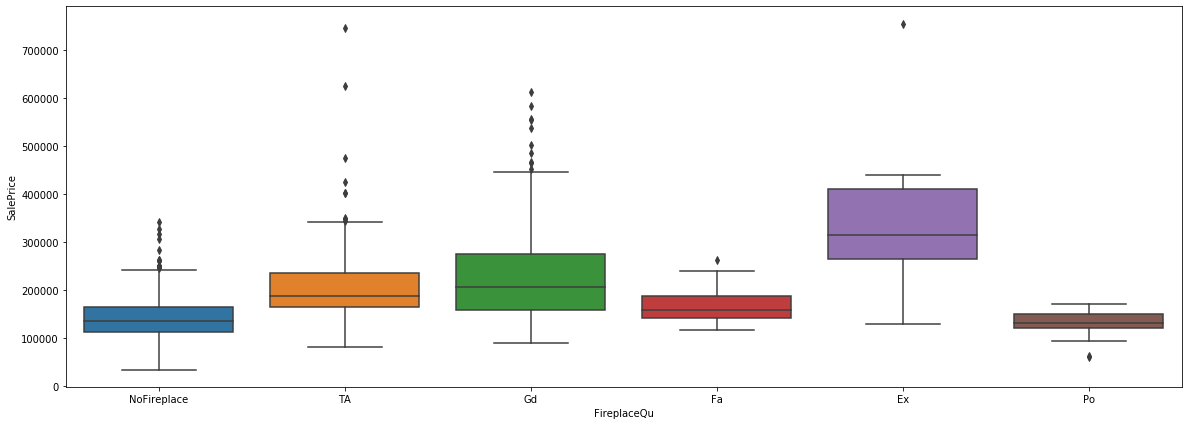

In [12]:
plt.figure(figsize=(20,7))
housing['FireplaceQu'].fillna('NoFireplace', inplace=True)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=housing)

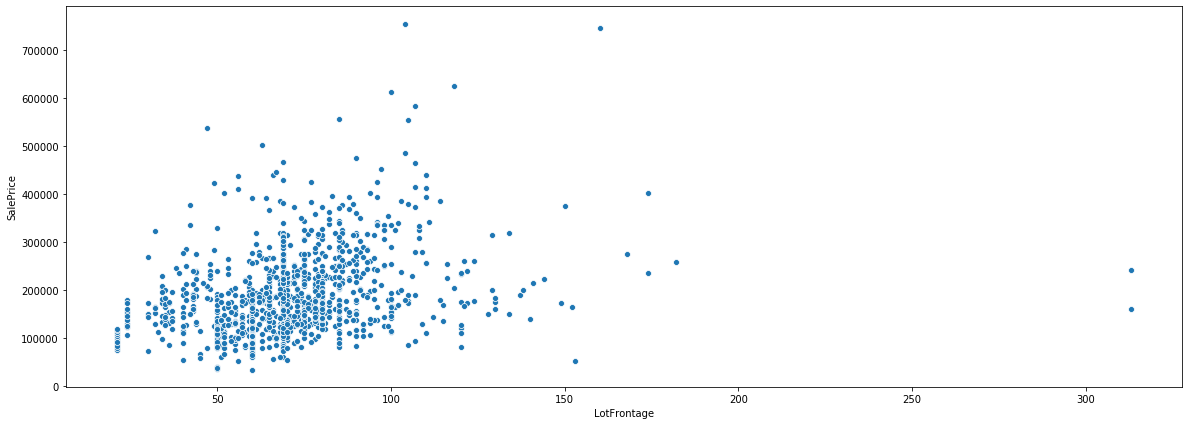

In [13]:
plt.figure(figsize=(20,7))
# Imputing with median
housing['LotFrontage'].fillna(housing['LotFrontage'].median(),inplace=True)
sns.scatterplot(x='LotFrontage', y='SalePrice', data=housing)

In [14]:
housing['GarageType'].fillna('No_Garage', inplace=True)
housing['GarageFinish'].fillna('No_Garage', inplace=True)
housing['GarageQual'].fillna('No_Garage', inplace=True)
housing['GarageCond'].fillna('No_Garage', inplace=True)

In [15]:
housing['BsmtExposure'].fillna('No_Bsmt', inplace=True)
housing['BsmtFinType2'].fillna('No_Bsmt', inplace=True)
housing['BsmtFinType1'].fillna('No_Bsmt', inplace=True)
housing['BsmtQual'].fillna('No_Bsmt', inplace=True)
housing['BsmtCond'].fillna('No_Bsmt', inplace=True)

#### Observation
* MasVnrType: Masonry veneer type (0.55% missing values)
* MasVnrArea: Masonry veneer Area (0.55% missing values)
* Electrical (0.07% missing values)

- ***We can safely drop null values***

In [16]:
housing = housing[~pd.isnull(housing['MasVnrType'])]
housing = housing[~pd.isnull(housing['MasVnrArea'])]
housing = housing[~pd.isnull(housing['Electrical'])]

### Dividing Data into Categorical and Numeric Variables

In [17]:
housing_numeric = housing.select_dtypes(include = ['int64', 'float64'])
housing_categorical = housing.select_dtypes(include = ['object'])

In [18]:
# Variance in Categorical Data
cat = housing_categorical.columns
for colName in cat :
    var = (housing[colName].value_counts()[0]/len(housing.index))*100
    if var > 95:
        print(f'{colName}: {var}')

Street: 99.58649207443143
Utilities: 99.93108201240524
Condition2: 98.96623018607856
RoofMatl: 98.20813232253617
Heating: 97.7946243969676


- Very low variation in the data
- **We can drop these columns**

In [19]:
housing_categorical = housing_categorical.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'], axis =1)

### Removing Duplicate and Redundant Data

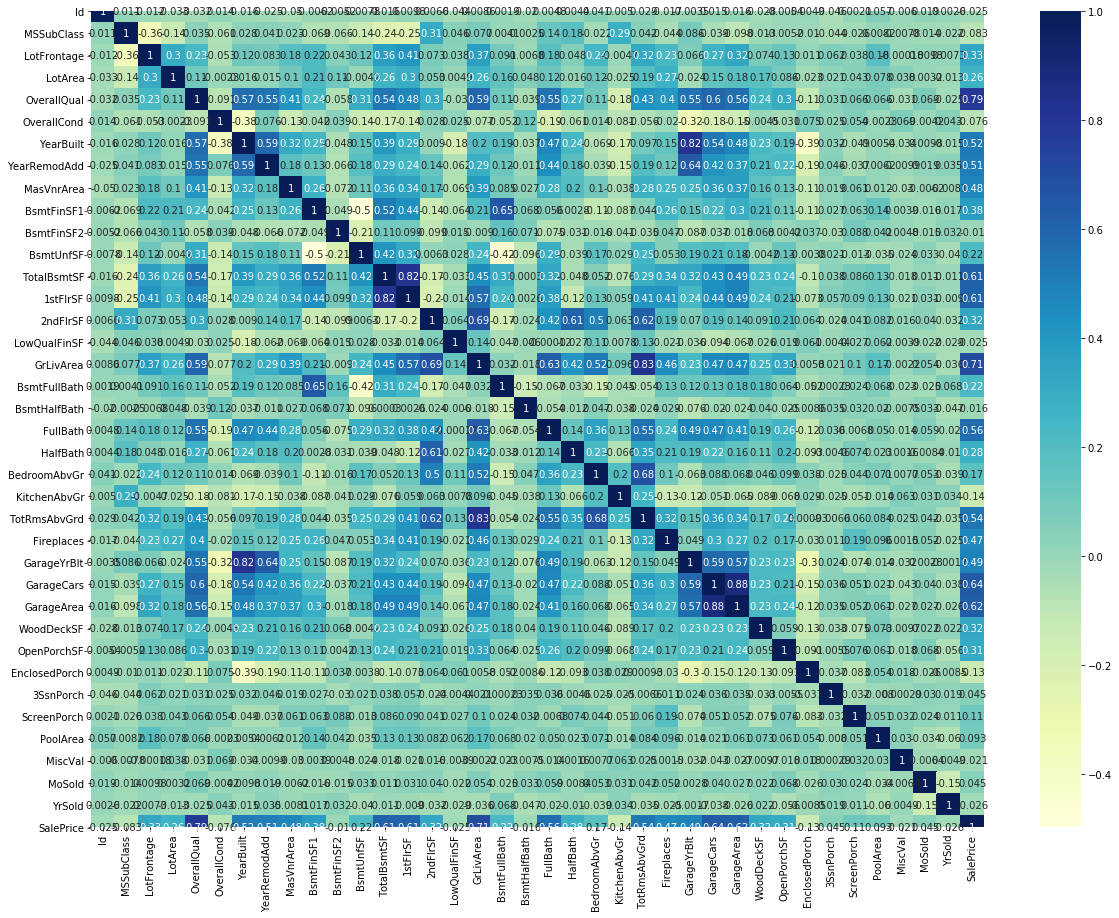

In [20]:
# correlation matrix
cor = housing_numeric.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

- YearBuilt and GarageYrBlt are highly correlated
- GarageArea and GarageCars are highly correlated
- We know that thses are related values

- **We can drop GarageYrBlt and GarageCars**

In [21]:
housing_numeric = housing_numeric.drop(['GarageYrBlt', 'GarageCars'], axis =1)

### Convert SalePrice into normal distribution using log values

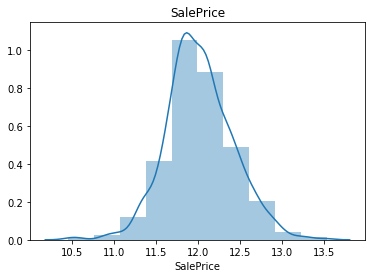

In [22]:
# Convert SalePrice to a normal distribution before scaling
housing_numeric['SalePrice'] = np.log1p(housing_numeric['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_numeric['SalePrice'], bins=10)
plt.show()

### Create Dummy variables

In [23]:
# Create dummies
categorical_dummies = pd.get_dummies(housing_categorical, drop_first=True)
categorical_dummies.head()

cat_cols = housing_categorical.columns

# Concatenate dummy variables with  housing
housing_categorical = pd.concat([housing_categorical, categorical_dummies], axis=1)

# Drop Categorical columns replaced by dummies
housing_categorical.drop(cat_cols, 1, inplace=True)

housing_categorical.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Bsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Bsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Bsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0

### Scale Numeric Variables

In [24]:
scaler = MinMaxScaler()

cols = housing_numeric.columns
housing_numeric = scaler.fit_transform(housing_numeric)
housing_numeric = pd.DataFrame(housing_numeric)
housing_numeric.columns = cols
housing_numeric.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,0.499228,0.217254,0.167280,0.043038,0.565970,0.572450,0.718061,0.579336,0.064848,0.078362,0.031776,0.242807,0.172882,0.189892,0.167914,0.010281,0.222339,0.141282,0.028946,0.520790,0.190558,0.358374,0.348725,0.376407,0.204227,0.333234,0.110167,0.084867,0.039769,0.006753,0.031572,0.003762,0.002823,0.483554,0.453825,0.508139
std,0.289060,0.249120,0.075495,0.046708,0.153496,0.139177,0.218770,0.344189,0.113193,0.080682,0.109754,0.189302,0.071672,0.088344,0.211358,0.085265,0.099058,0.172947,0.119725,0.183434,0.251287,0.101886,0.073190,0.135548,0.214481,0.151038,0.146367,0.120768,0.110703,0.057888,0.116495,0.054609,0.032106,0.245487,0.332344,0.129952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249143,0.000000,0.133562,0.029155,0.444444,0.500000,0.594203,0.266667,0.000000,0.000000,0.000000,0.095034,0.130115,0.125746,0.000000,0.000000,0.149586,0.000000,0.000000,0.333333,0.000000,0.250000,0.333333,0.250000,0.000000,0.230959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,0.427511
50%,0.498972,0.176471,0.164384,0.038220,0.555556,0.500000,0.724638,0.716667,0.000000,0.067505,0.000000,0.205051,0.162193,0.172556,0.000000,0.000000,0.212886,0.000000,0.000000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,0.337094,0.000000,0.043876,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.500347
75%,0.749486,0.294118,0.198630,0.048143,0.666667,0.625000,0.927536,0.900000,0.103750,0.125266,0.000000,0.345890,0.212357,0.242542,0.352542,0.000000,0.271665,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.416667,0.333333,0.406206,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.589898
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Convert Data to Clean Format

In [25]:
housing_numeric.reset_index(drop=True, inplace=True)
housing_categorical.reset_index(drop=True, inplace=True)

In [26]:
housing_final = pd.concat([housing_numeric, housing_categorical], axis=1)
housing_final.shape

(1451, 225)

In [27]:
# Used this to remove top 5 input features for checking Assisgnment Question
#housing_final = housing_final.drop(['GrLivArea', 'OverallQual', 'OverallCond', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RH', 'TotRmsAbvGrd'], axis=1)

X = housing_final.drop(['SalePrice'], axis=1)
y = housing_final['SalePrice']

## Build Model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size = 0.25, random_state=18)

#### Recursive feature elimination (RFE)¶
- Since there are around 220 features, we will use RFE to get the best 100 features and use the new features for further analysis

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 100)
rfe = rfe.fit(X_train, y_train)

### Variable Selection

In [30]:
# Assign the columns selected by RFE to cols
col = X_train.columns[rfe.support_]

# assign the 100 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)
print(temp_df)

# Assign the 100 columns to X_train_rfe

X_train_rfe = X_train[col]

# Associate the new 100 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

                  Variable  rfe_support  rfe_ranking
0               MSSubClass         True            1
1              LotFrontage         True            1
2                  LotArea         True            1
3              OverallQual         True            1
4              OverallCond         True            1
5                YearBuilt         True            1
6               BsmtFinSF1         True            1
7               BsmtFinSF2         True            1
8                BsmtUnfSF         True            1
9              TotalBsmtSF         True            1
10                1stFlrSF         True            1
11                2ndFlrSF         True            1
12            LowQualFinSF         True            1
13               GrLivArea         True            1
14            BsmtFullBath         True            1
15                FullBath         True            1
16                HalfBath         True            1
17            KitchenAbvGr         True       

### Ridge

In [31]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params,  
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [32]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,1,-0.027731,-0.031888,1
11,0.9,-0.027656,-0.031891,2
10,0.8,-0.027577,-0.031900,3
9,0.7,-0.027498,-0.031915,4
8,0.6,-0.027421,-0.031944,5
7,0.5,-0.027346,-0.031989,6
13,2,-0.028395,-0.031995,7
6,0.4,-0.027268,-0.032046,8
5,0.3,-0.027197,-0.032117,9
4,0.2,-0.027126,-0.032223,10


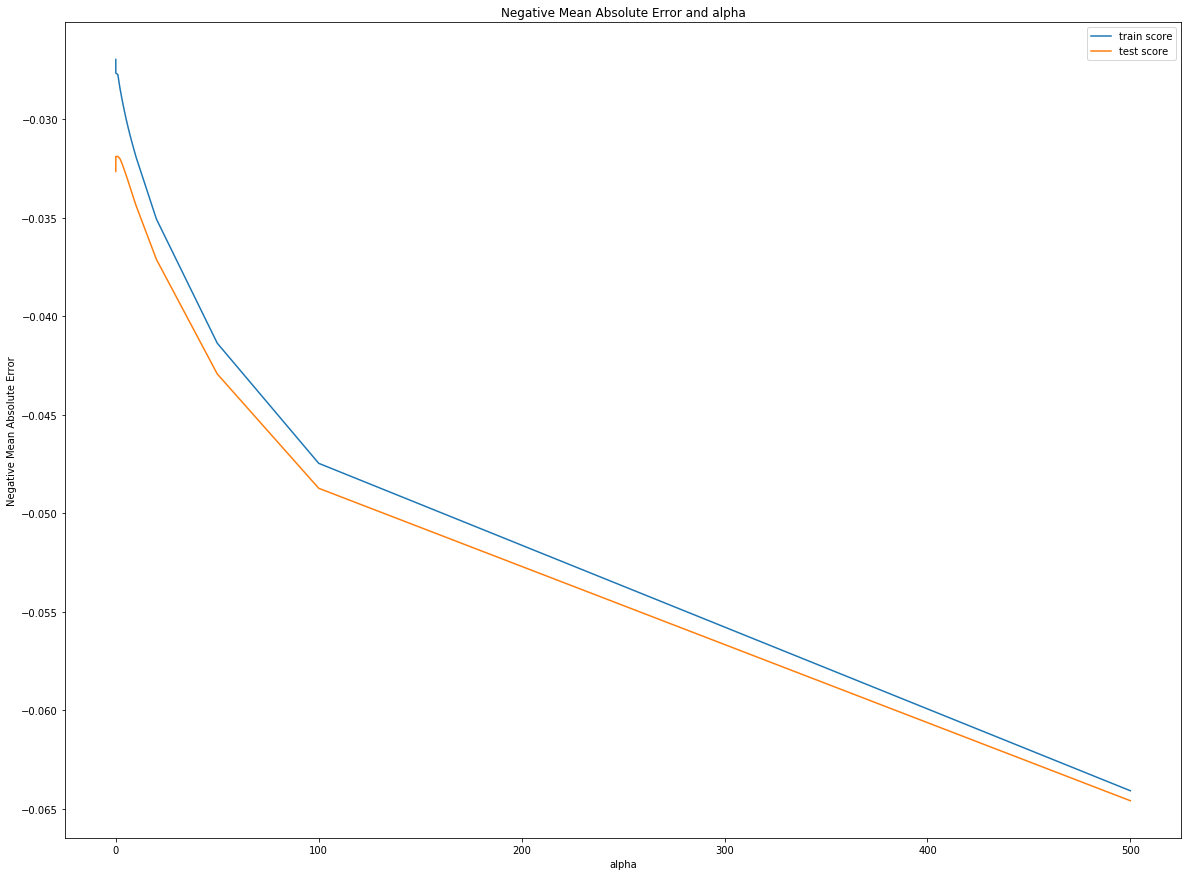

In [33]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,15))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [34]:
alpha = ridge_model_cv.best_estimator_.alpha

print(f'Best estimate of lambda: {alpha}')

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

Best estimate of lambda: 1.0


0.001787548897135392

In [35]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The training accuracy is:
0.8997246104733645
The testing accuracy is:
0.898347816291367


In [36]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df = ridge_df[ridge_df['Coefficient'] != 0.00]
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by=['Coefficient'], ascending=False)

,Features,Coefficient
3,OverallQual,0.1784
13,GrLivArea,0.1290
10,1stFlrSF,0.1272
24,MSZoning_FV,0.1122
25,MSZoning_RH,0.0972
26,MSZoning_RL,0.0966
4,OverallCond,0.0926
18,TotRmsAbvGrd,0.0810
2,LotArea,0.0745
27,MSZoning_RM,0.0732


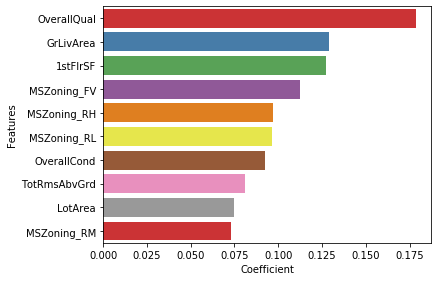

In [37]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_df.sort_values(by=['Coefficient'], ascending=False)[0:10])
plt.show()

## Lasso

In [38]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [39]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.028178,-0.031639,1
1,0.0002,-0.029491,-0.032008,2
2,0.0003,-0.030297,-0.032591,3
3,0.0004,-0.031119,-0.033267,4
4,0.0005,-0.031908,-0.033960,5
5,0.001,-0.035909,-0.037640,6
6,0.002,-0.041831,-0.043039,7
7,0.003,-0.045776,-0.046931,8
8,0.004,-0.050079,-0.051339,9
9,0.005,-0.054995,-0.056333,10


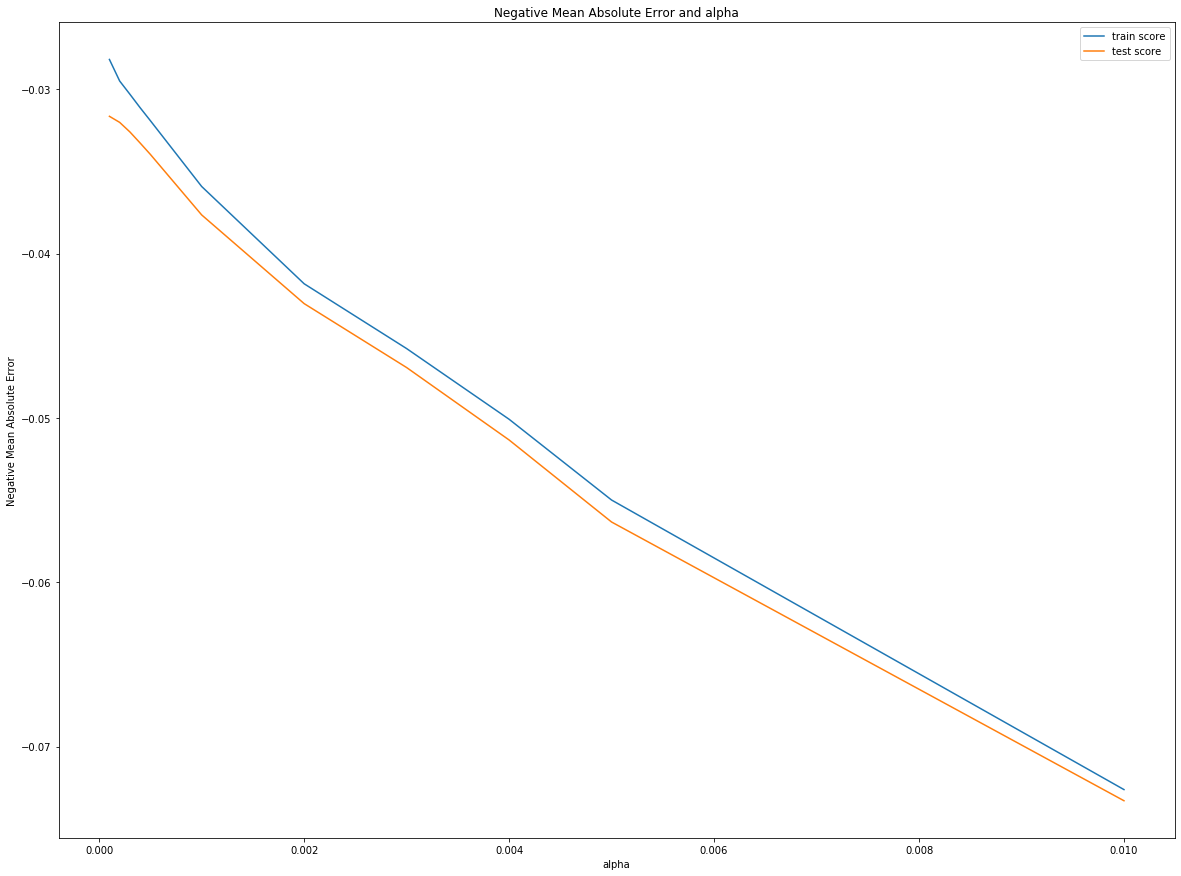

In [40]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(20,15))

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [41]:
alpha = lasso_model_cv.best_estimator_.alpha

print(f'Best estimate of lambda: {alpha}')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

mean_squared_error(y_test, lasso.predict(X_test))

Best estimate of lambda: 0.0001


0.0017152808884873703

In [42]:
# predict for the training dataset
y_train_pred = lasso.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

# predict for the test dataset
y_test_pred = lasso.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The training accuracy is:
0.8926083786565626
The testing accuracy is:
0.9023171063788025


In [43]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by=['Coefficient'], ascending=False)

,Features,Coefficient
10,GrLivArea,0.2944
3,OverallQual,0.2103
4,OverallCond,0.0953
20,MSZoning_FV,0.0929
22,MSZoning_RL,0.0788
21,MSZoning_RH,0.0714
15,TotRmsAbvGrd,0.0686
16,GarageArea,0.0622
5,YearBuilt,0.0567
2,LotArea,0.0552


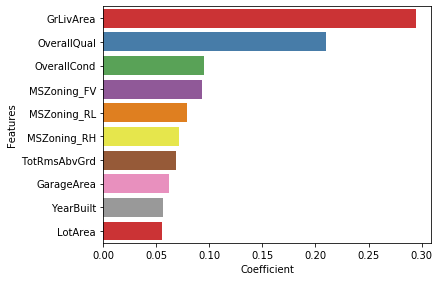

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_df.sort_values(by=['Coefficient'], ascending=False)[0:10])
plt.show()

### Conclusion :


### Top 10 Significant Features affecting House Prices 

#### For Ridge Model

- OverallQual
- GrLivArea
- 1stFlrSF
- MSZoning_FV
- MSZoning_RH
- MSZoning_RL
- OverallCond
- TotRmsAbvGrd
- LotArea
- MSZoning_RM	

#### For Lasso Model

- GrLivArea
- OverallQual
- OverallCond
- MSZoning_FV
- MSZoning_RL
- MSZoning_RH
- TotRmsAbvGrd
- GarageArea
- YearBuilt
- LotArea	

### Optimal Lambda Value and MSE

#### For Ridge
* Optimal Lambda Value - 1.0
* Mean Squared error - 0.001787
* Training Accuracy - 89.97 %
* Testing accuracy - 89.83 %

#### For Lasso
* Optimal Lambda Value - 0.0001
* Mean Squared error - 0.001715
* Training Accuracy - 89.26 %
* Testing accuracy - 90.23 %